In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("/content/gdrive/My Drive/dl_coursework")

In [0]:
import torch
import copy
import utils
import decoder
import trainnet
import wavelet
import dip.skip as skip
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# read a image without noise and convert it to tensor
img_path = './test_data/astronaut.png'
img_pil = Image.open(img_path)
img_clean_np = utils.pil_numpy(img_pil)
img_clean_tensor = utils.np_tensor(img_clean_np)
img_clean_tensor = img_clean_tensor.cuda()

In [0]:
img_clean_np.shape

(3, 512, 512)

In [0]:
def add_noise(img_np, sigma):
    noise = np.random.normal(scale=sigma, size=img_np.shape)
    img_noisy_np = img_np + noise
    return np.clip(img_noisy_np, 0,1).astype(np.float32), noise

In [0]:
# add noise to the image
img_noisy_np, noise_np = add_noise(img_clean_np, sigma=0.1)
img_noisy_tensor = utils.np_tensor(img_noisy_np)
img_noisy_tensor = img_noisy_tensor.cuda()

In [0]:
def get_dip_input(input_depth, img_size):
    net_input = torch.zeros((1,input_depth, img_size, img_size))
    net_input.uniform_()
    net_input *= 1./10
    return net_input

In [0]:
dip_net_input = get_dip_input(2, 512)

## Fit noisy image

In [0]:
# deep decoder
dd_fit_noisy = decoder.Decoder(k_channels=64,
                            output_channels=3,
                            upsample_times=5)

dd_noisy, dd_noisy_mse_n, dd_noisy_mse_t, dd_noisy_input = trainnet.train_net(net = dd_fit_noisy,
                                                                              num_epoches = 30000,
                                                                              lr = 0.01,
                                                                              img_noisy = img_noisy_tensor,
                                                                              img_clean = img_clean_tensor,
                                                                              k_channels = 64)

tensor(0.0860, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0092, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0092, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0091, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0091, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0091, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0089, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0089, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0089, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0089, device='cuda:0', grad_fn=<MseLossBackward

In [0]:
# dip
dip_fit_noisy = skip.skip(num_input_channels=2, num_output_channels=3,
                      upsample_mode='nearest', downsample_mode='avg',
                      pad='reflection')

dip_noisy, dip_noisy_mse_n, dip_noisy_mse_t, dip_noisy_input = trainnet.train_net(net = dip_fit_noisy,
                                                                                  num_epoches = 30000,
                                                                                  lr = 0.01,
                                                                                  net_input = dip_net_input,
                                                                                  img_noisy = img_noisy_tensor,
                                                                                  img_clean = img_clean_tensor,
                                                                                  k_channels = None)

tensor(0.0903, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0092, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0085, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0114, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0095, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0092, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0093, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0089, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0086, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0083, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0080, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0077, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0072, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0070, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0068, device='cuda:0', grad_fn=<MseLossBackward

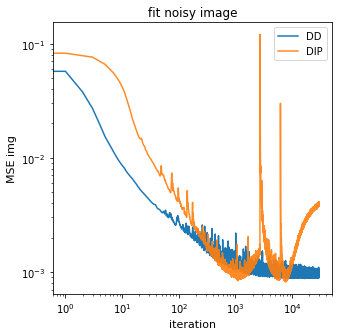

In [0]:
plt.figure(figsize=(5,5))
plt.loglog(dd_noisy_mse_t, label='DD')
plt.loglog(dip_noisy_mse_t, alpha=0.9, label='DIP')
plt.xlabel('iteration', fontsize=11)
plt.ylabel('MSE img', fontsize=11)
plt.title('fit noisy image')
plt.legend()

## Fit clean image

In [0]:
# deep decoder
dd_fit_clean = decoder.Decoder(k_channels=64,
                            output_channels=3,
                            upsample_times=5)

dd_clean, dd_clean_mse_n, dd_clean_mse_t, dd_clean_input = trainnet.train_net(net = dd_fit_clean,
                                                                              num_epoches = 30000,
                                                                              lr = 0.01,
                                                                              img_noisy = img_clean_tensor,
                                                                              img_clean = img_clean_tensor,
                                                                              k_channels = 64)

tensor(0.0831, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward

In [0]:
# dip
dip_fit_clean = skip.skip(num_input_channels=2, num_output_channels=3,
                      upsample_mode='nearest', downsample_mode='avg',
                      pad='reflection')

dip_clean, dip_clean_mse_n, dip_clean_mse_t, dip_clean_input = trainnet.train_net(net = dip_fit_clean,
                                                                                  num_epoches = 30000,
                                                                                  lr = 0.01,
                                                                                  net_input = dip_net_input,
                                                                                  img_noisy = img_clean_tensor,
                                                                                  img_clean = img_clean_tensor,
                                                                                  k_channels = None)

tensor(0.0879, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward

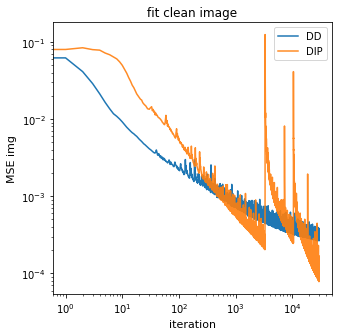

In [0]:
plt.figure(figsize=(5,5))
plt.loglog(dd_clean_mse_t, label='DD')
plt.loglog(dip_clean_mse_t, alpha=0.9, label='DIP')
plt.xlabel('iteration', fontsize=11)
plt.ylabel('MSE img', fontsize=11)
plt.title('fit clean image')
plt.legend()

## Fit noise

In [0]:
noise_tensor = utils.np_tensor(noise_np).type(torch.float32)

In [0]:
# deep decoder
dd_fit_noise = decoder.Decoder(k_channels=64,
                            output_channels=3,
                            upsample_times=5)

dd_noise, dd_noise_mse_n, dd_noise_mse_t, dd_noise_input = trainnet.train_net(net = dd_fit_noise,
                                                                              num_epoches = 30000,
                                                                              lr = 0.01,
                                                                              img_noisy = noise_tensor,
                                                                              img_clean = noise_tensor,
                                                                              k_channels = 64)

tensor(0.2850, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0099, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0098, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0097, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0097, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0097, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0096, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0096, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0096, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0096, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0095, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0095, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0095, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0096, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0095, device='cuda:0', grad_fn=<MseLossBackward

In [0]:
# dip
dip_fit_noise = skip.skip(num_input_channels=2, num_output_channels=3,
                      upsample_mode='nearest', downsample_mode='avg',
                      pad='reflection')

dip_noise, dip_noise_mse_n, dip_noise_mse_t, dip_noise_input = trainnet.train_net(net = dip_fit_noise,
                                                                                  num_epoches = 30000,
                                                                                  lr = 0.01,
                                                                                  net_input = dip_net_input,
                                                                                  img_noisy = noise_tensor,
                                                                                  img_clean = noise_tensor,
                                                                                  k_channels = None)

tensor(0.2544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0096, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0085, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0079, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0078, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0076, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0075, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0075, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0073, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0073, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0073, device='cuda:0', grad_fn=<MseLossBackward

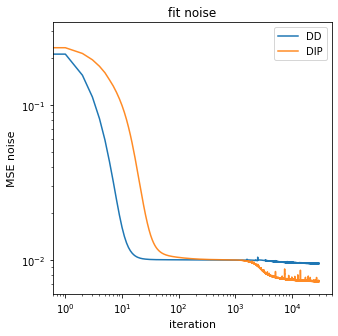

In [0]:
plt.figure(figsize=(5,5))
plt.loglog(dd_noise_mse_t, label='DD')
plt.loglog(dip_noise_mse_t, alpha=0.9, label='DIP')
plt.xlabel('iteration', fontsize=11)
plt.ylabel('MSE noise', fontsize=11)
plt.title('fit noise')
plt.legend()